In [3]:
import pandas as pd
df= pd.read_csv('annotation_df.csv')

In [4]:
df.head()

,Name,UCSC_RefGene_Name
0,cg04400972,TRIM45;TRIM45
1,cg24466241,ZYG11A
2,cg02650266,NaN
3,cg05991454,NaN
4,cg25316339,ANKRD34B


In [7]:
# Get basic info about the DataFrame
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               73 non-null     object
 1   UCSC_RefGene_Name  57 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [8]:
df.describe()

,Name,UCSC_RefGene_Name
count,73,57
unique,73,56
top,cg04400972,KLF14
freq,1,2


In [9]:
# Check for missing values
print(df.isnull().sum())

Name                  0
UCSC_RefGene_Name    16
dtype: int64


In [10]:
df.shape

(73, 2)

In [11]:
df= df.dropna()

In [12]:
df.shape

(57, 2)

In [13]:
df.head()

,Name,UCSC_RefGene_Name
0,cg04400972,TRIM45;TRIM45
1,cg24466241,ZYG11A
4,cg25316339,ANKRD34B
5,cg00292135,C7orf13;RNF32
6,cg09124496,LOC285954;LOC285954;INHBA


In [14]:
# Get the number of unique genes
unique_genes = df['UCSC_RefGene_Name'].nunique()
print(f"Number of unique genes: {unique_genes}")

# Display the unique gene names
print(df['UCSC_RefGene_Name'].unique())


Number of unique genes: 56
['TRIM45;TRIM45' 'ZYG11A' 'ANKRD34B' 'C7orf13;RNF32'
 'LOC285954;LOC285954;INHBA' 'CALB1' 'KLHL35' 'OTUD7A' 'SLC6A4;SLC6A4'
 'PPM1E' 'CCDC102B' 'PI4KB' 'RASSF5;RASSF5' 'EDARADD;EDARADD;EDARADD' 'F5'
 'ATP13A2;ATP13A2;ATP13A2' 'LIX1L' 'GPR177'
 'LIPT1;LIPT1;LIPT1;LIPT1;TSGA10;LIPT1' 'NOSTRIN;NOSTRIN;NOSTRIN;NOSTRIN'
 'DNER' 'SFMBT1;SFMBT1;SFMBT1' 'BOC;WDR52' 'HERC6;HERC6' 'ACCN5' 'ERGIC1'
 'NHSL1;NHSL1' 'SCGN;SCGN' 'HCG18;TRIM39;TRIM39;HCG18;TRIM39' 'MAP3K5'
 'NHLRC1' 'MKLN1' 'KLF14' 'ELN;ELN;ELN;ELN;ELN'
 'RNF170;RNF170;RNF170;RNF170;RNF170;RNF170' 'IL7' 'CHMP4C' 'ALDH1A1'
 'ARHGAP22' 'SLC25A22' 'TBK1' 'TRPV4;TRPV4' 'RARG' 'HTR2A;HTR2A;HTR2A'
 'MIR770;MEG3;MEG3;MEG3' 'NQO1;NQO1;NQO1' 'ASPA;ASPA'
 'ACACA;ACACA;ACACA;ACACA;ACACA' 'IFI35' 'COL1A1' 'PGAP3' 'EIF1' 'AKAP8L'
 'FUT3;FUT3;FUT3;FUT3' 'SLC12A5;SLC12A5' 'APOL1;APOL1;APOL1;APOL1']


In [21]:
# Split the 'UCSC_RefGene_Name' column into multiple rows
df_split = df.assign(UCSC_RefGene_Name=df['UCSC_RefGene_Name'].str.split(';')).explode('UCSC_RefGene_Name')

# Remove any leading or trailing spaces from the gene names
df_split['UCSC_RefGene_Name'] = df_split['UCSC_RefGene_Name'].str.strip()
# Drop duplicate gene names within the same CpG site
df_split = df_split.drop_duplicates(subset=['Name', 'UCSC_RefGene_Name'])
# Display the DataFrame after splitting
df_split.head()

,Name,UCSC_RefGene_Name
0,cg04400972,TRIM45
1,cg24466241,ZYG11A
4,cg25316339,ANKRD34B
5,cg00292135,C7orf13
5,cg00292135,RNF32


In [20]:
df_split.shape

(63, 2)

In [22]:
df = df_split

In [23]:
# Group by gene name and count the number of CpG sites associated with each gene
gene_counts = df.groupby('UCSC_RefGene_Name').size().reset_index(name='CpG_Count')
print(gene_counts.sort_values(by='CpG_Count', ascending=False))


   UCSC_RefGene_Name  CpG_Count
29             KLF14          2
0              ACACA          1
46              RARG          1
34            MAP3K5          1
35              MEG3          1
..               ...        ...
25             HTR2A          1
26             IFI35          1
27               IL7          1
28             INHBA          1
61            ZYG11A          1

[62 rows x 2 columns]


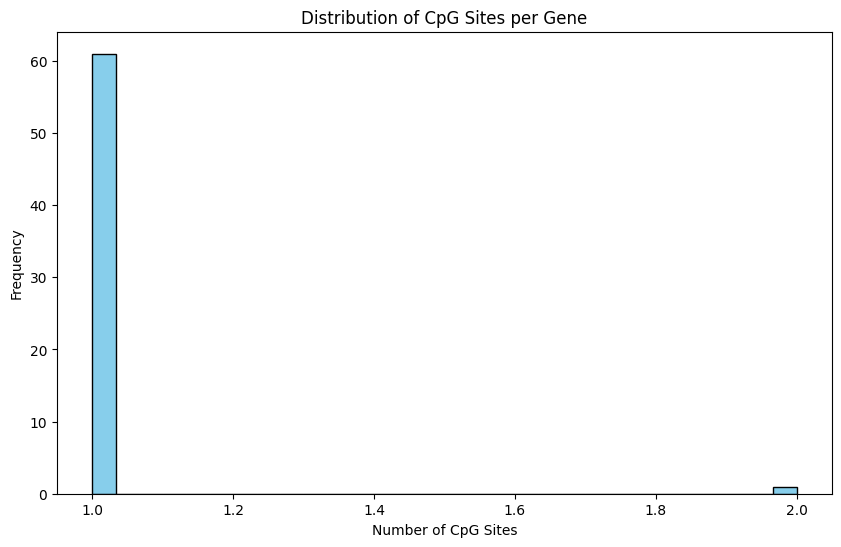

In [24]:
import matplotlib.pyplot as plt

# Plot the distribution of CpG site counts per gene
plt.figure(figsize=(10, 6))
plt.hist(gene_counts['CpG_Count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CpG Sites per Gene')
plt.xlabel('Number of CpG Sites')
plt.ylabel('Frequency')
plt.show()


In [25]:
# Extract the unique gene names
unique_genes = df['UCSC_RefGene_Name'].unique()

# Save the unique gene names to a text file
with open('gene_list.txt', 'w') as f:
    for gene in unique_genes:
        f.write(f"{gene}\n")

print(f"Gene list saved with {len(unique_genes)} unique genes.")

Gene list saved with 62 unique genes.
